# Forest Cover Classification Using Neural Network

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from keras import optimizers

In [2]:
# Reading the dataset
data_set = pd.read_csv("covtype.csv")
data_set.shape

(581012, 55)

In [3]:
# Separating the input features and target variable
X = data_set.iloc[:, :-1]
y = data_set['Cover_Type'] - 1

In [4]:
# Checking for missing values
missing_values = X.isnull().sum().sum()
print("Number of missing values in the dataset:",missing_values)

Number of missing values in the dataset: 0


In [5]:
# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Splitting the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
X_train.shape

(464809, 54)

In [8]:
X_test.shape

(116203, 54)

## ReLU Activation Function

In [121]:
# Designing the neural network
model1 = Sequential()
model1.add(Input(shape=(X_train.shape[1],)))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(7, activation='softmax'))

In [122]:
# Compiling the model
opt = optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=512, verbose=1)

Epoch 1/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7181 - loss: 0.6784 - val_accuracy: 0.8120 - val_loss: 0.4476
Epoch 2/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8264 - loss: 0.4138 - val_accuracy: 0.8470 - val_loss: 0.3679
Epoch 3/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8582 - loss: 0.3429 - val_accuracy: 0.8716 - val_loss: 0.3158
Epoch 4/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8780 - loss: 0.2970 - val_accuracy: 0.8851 - val_loss: 0.2799
Epoch 5/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8919 - loss: 0.2656 - val_accuracy: 0.8903 - val_loss: 0.2652
Epoch 6/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9000 - loss: 0.2454 - val_accuracy: 0.9001 - val_loss: 0.2436
Epoch 7/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9060 - loss: 0.2292 - val_accuracy: 0.9015 - val_loss: 0.2390
Epoch 8/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9122 - loss: 0.2157 - val_accu

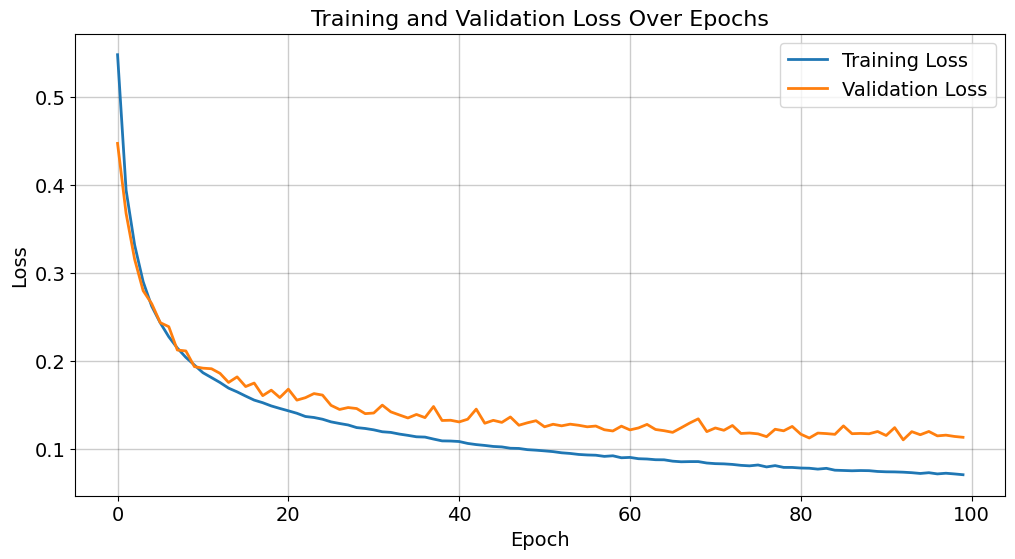

In [123]:
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Loss Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="upper right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

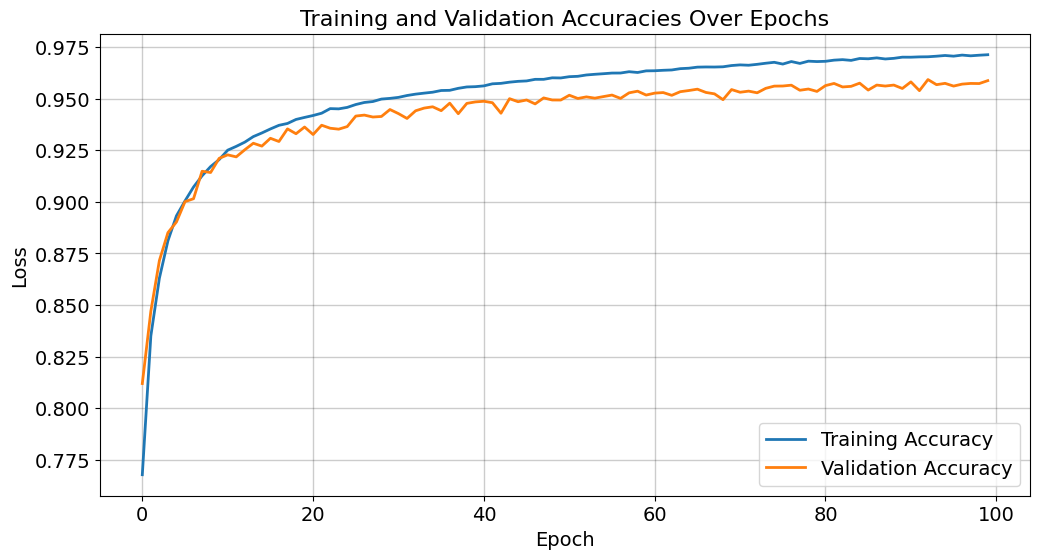

In [124]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Accuracies Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="lower right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

In [125]:
# Predictions for training and test sets
y_train_pred1 = model1.predict(X_train)
y_test_pred1 = model1.predict(X_test)

14526/14526 ━━━━━━━━━━━━━━━━━━━━ 9s 636us/step
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 2s 590us/step


In [126]:
# Convert predictions to class labels
y_train_pred_classes1 = y_train_pred1.argmax(axis=1)
y_test_pred_classes1 = y_test_pred1.argmax(axis=1)

# Training metrics
train_accuracy1 = accuracy_score(y_train, y_train_pred_classes1)
train_precision1 = precision_score(y_train, y_train_pred_classes1, average='macro')
train_recall1 = recall_score(y_train, y_train_pred_classes1, average='macro')
train_f1_1 = f1_score(y_train, y_train_pred_classes1, average='macro')

# Test metrics
test_accuracy1 = accuracy_score(y_test, y_test_pred_classes1)
test_precision1 = precision_score(y_test, y_test_pred_classes1, average='macro')
test_recall1 = recall_score(y_test, y_test_pred_classes1, average='macro')
test_f1_1 = f1_score(y_test, y_test_pred_classes1, average='macro')

In [127]:
print("Training Accuracy (in %):",round(train_accuracy1*100,3))
print("Training Precision (in %):",round(train_precision1*100,3))
print("Training Recall (in %):",round(train_recall1*100,3))
print("Training F1 Score (in %):",round(train_f1_1*100,3))
print()
print("Test Accuracy (in %):",round(test_accuracy1*100,3))
print("Test Precision (in %):",round(test_precision1*100,3))
print("Test Recall (in %):",round(test_recall1*100,3))
print("Test F1 Score (in %):",round(test_f1_1*100,3))

Training Accuracy (in %): 97.535
Training Precision (in %): 96.529
Training Recall (in %): 95.054
Training F1 Score (in %): 95.78

Test Accuracy (in %): 95.872
Test Precision (in %): 94.2
Test Recall (in %): 92.102
Test F1 Score (in %): 93.123


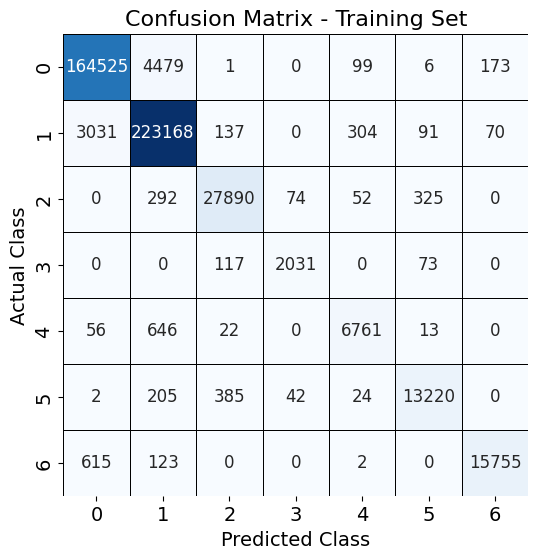

In [128]:
# Confusion matrix for training set
train_conf_matrix1 = confusion_matrix(y_train, y_train_pred_classes1)
plt.figure(figsize=(6, 6))
sns.heatmap(train_conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Training Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

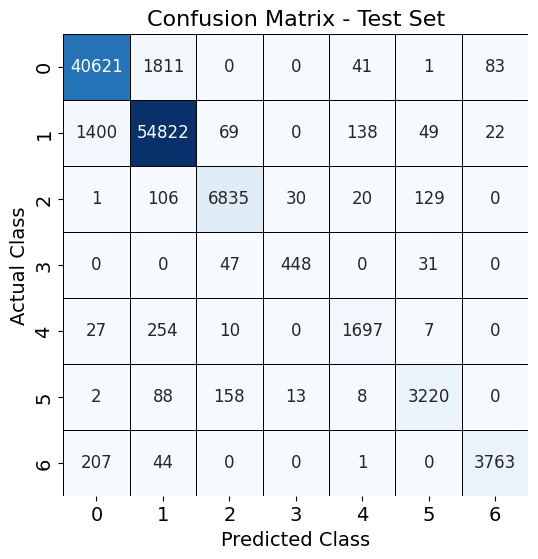

In [129]:
# Confusion matrix for test set
test_conf_matrix1 = confusion_matrix(y_test, y_test_pred_classes1)
plt.figure(figsize=(6, 6))
sns.heatmap(test_conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Test Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In the above confusion matrices, the labels have been zero-indexed (1 to 7 has been converted to 0 to 6)

In [130]:
# Count of actual labels in the training set
train_actual_counts = y_train.value_counts().sort_index()
# Count of predicted labels in the training set
train_pred_counts1 = pd.Series(y_train_pred_classes1).value_counts().sort_index()

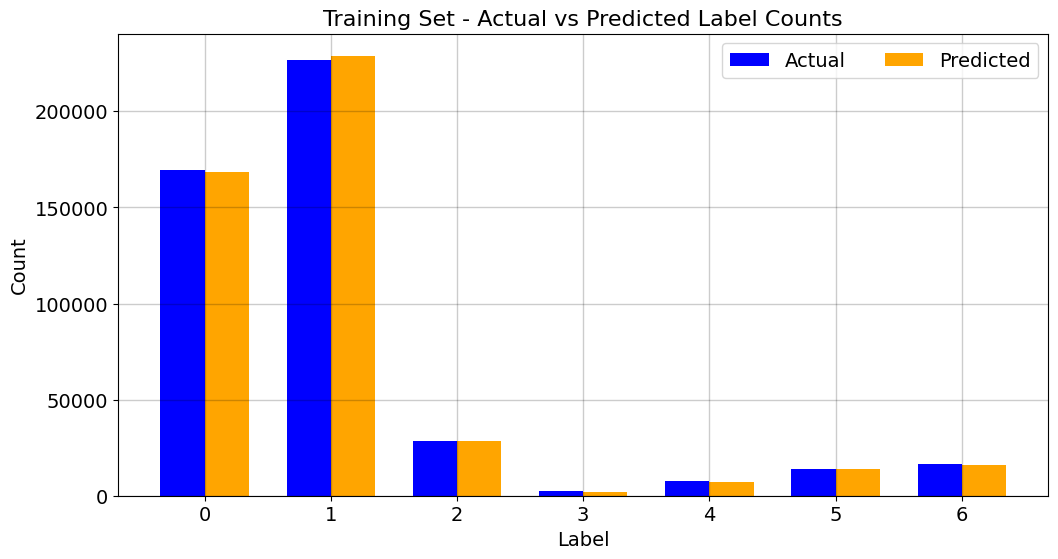

In [131]:
# Bar plot for training set
labels = train_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, train_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, train_pred_counts1, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Training Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.show()

In [132]:
# Count of actual labels in the test set
test_actual_counts = y_test.value_counts().sort_index()
# Count of predicted labels in the test set
test_pred_counts1 = pd.Series(y_test_pred_classes1).value_counts().sort_index()

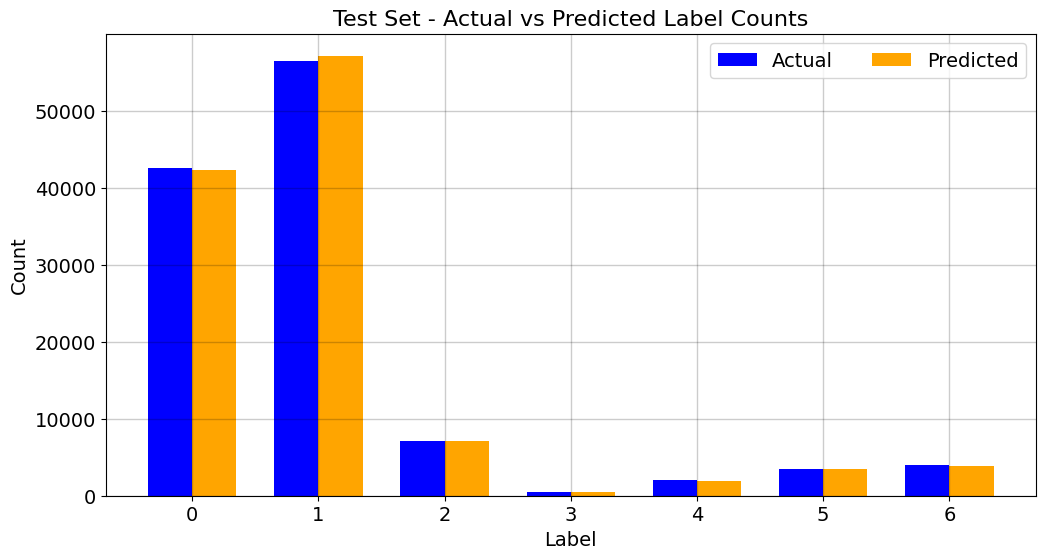

In [133]:
# Bar plot for training set
labels = test_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, test_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, test_pred_counts1, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Test Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.show()

## Tanh Activation Function

In [173]:
# Designing the neural network
model2 = Sequential()
model2.add(Input(shape=(X_train.shape[1],)))
model2.add(Dense(512, activation='tanh'))
model2.add(Dense(256, activation='tanh'))
model2.add(Dense(128, activation='tanh'))
model2.add(Dense(64, activation='tanh'))
model2.add(Dense(32, activation='tanh'))
model2.add(Dense(7, activation='softmax'))

In [174]:
# Compiling the model
opt = optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=512, verbose=1)

Epoch 1/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7406 - loss: 0.6430 - val_accuracy: 0.8423 - val_loss: 0.3871
Epoch 2/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8580 - loss: 0.3483 - val_accuracy: 0.8823 - val_loss: 0.2904
Epoch 3/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8910 - loss: 0.2702 - val_accuracy: 0.8994 - val_loss: 0.2470
Epoch 4/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9087 - loss: 0.2287 - val_accuracy: 0.9128 - val_loss: 0.2158
Epoch 5/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9186 - loss: 0.2026 - val_accuracy: 0.9195 - val_loss: 0.2019
Epoch 6/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9252 - loss: 0.1861 - val_accuracy: 0.9238 - val_loss: 0.1917
Epoch 7/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9312 - loss: 0.1722 - val_accuracy: 0.9290 - val_loss: 0.1783
Epoch 8/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9347 - loss: 0.1616 - val_accu

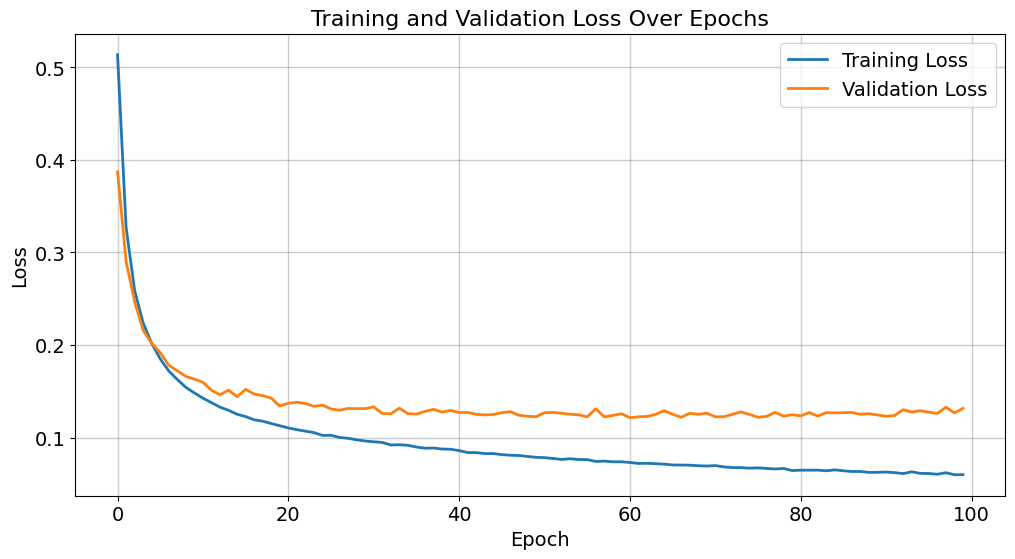

In [175]:
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Loss Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="upper right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

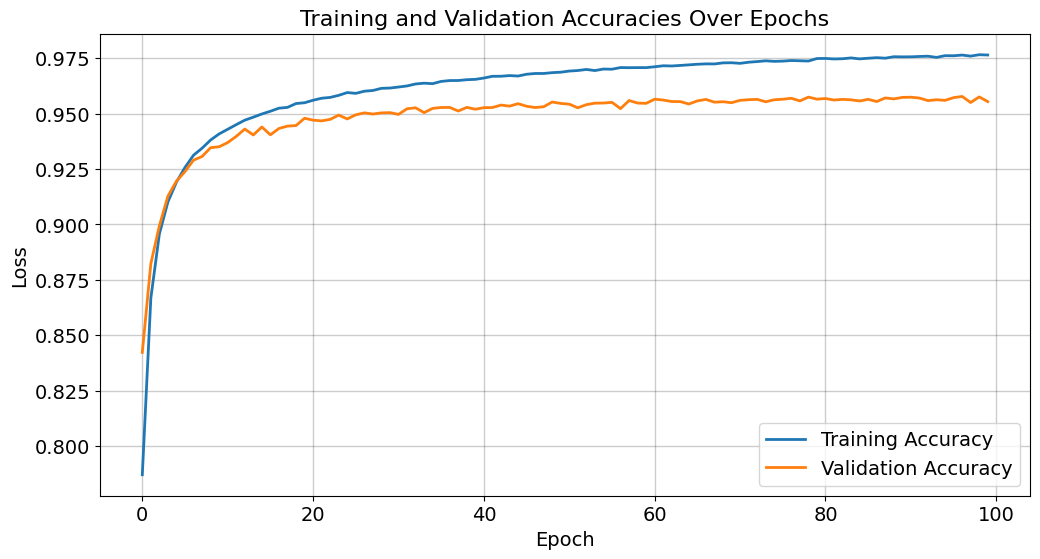

In [176]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Accuracies Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="lower right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

In [177]:
# Predictions for training and test sets
y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)

14526/14526 ━━━━━━━━━━━━━━━━━━━━ 10s 698us/step
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 2s 664us/step


In [178]:
# Convert predictions to class labels
y_train_pred_classes2 = y_train_pred2.argmax(axis=1)
y_test_pred_classes2 = y_test_pred2.argmax(axis=1)

# Training metrics
train_accuracy2 = accuracy_score(y_train, y_train_pred_classes2)
train_precision2 = precision_score(y_train, y_train_pred_classes2, average='macro')
train_recall2 = recall_score(y_train, y_train_pred_classes2, average='macro')
train_f1_2 = f1_score(y_train, y_train_pred_classes2, average='macro')

# Test metrics
test_accuracy2 = accuracy_score(y_test, y_test_pred_classes2)
test_precision2 = precision_score(y_test, y_test_pred_classes2, average='macro')
test_recall2 = recall_score(y_test, y_test_pred_classes2, average='macro')
test_f1_2 = f1_score(y_test, y_test_pred_classes2, average='macro')

In [179]:
print("Training Accuracy (in %):",round(train_accuracy2*100,3))
print("Training Precision (in %):",round(train_precision2*100,3))
print("Training Recall (in %):",round(train_recall2*100,3))
print("Training F1 Score (in %):",round(train_f1_2*100,3))
print()
print("Test Accuracy (in %):",round(test_accuracy2*100,3))
print("Test Precision (in %):",round(test_precision2*100,3))
print("Test Recall (in %):",round(test_recall2*100,3))
print("Test F1 Score (in %):",round(test_f1_2*100,3))

Training Accuracy (in %): 97.742
Training Precision (in %): 95.612
Training Recall (in %): 96.139
Training F1 Score (in %): 95.869

Test Accuracy (in %): 95.54
Test Precision (in %): 92.041
Test Recall (in %): 92.279
Test F1 Score (in %): 92.157


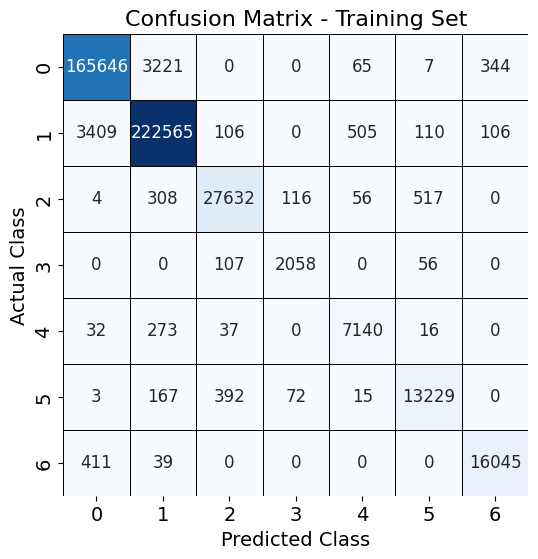

In [180]:
# Confusion matrix for training set
train_conf_matrix2 = confusion_matrix(y_train, y_train_pred_classes2)
plt.figure(figsize=(6, 6))
sns.heatmap(train_conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Training Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

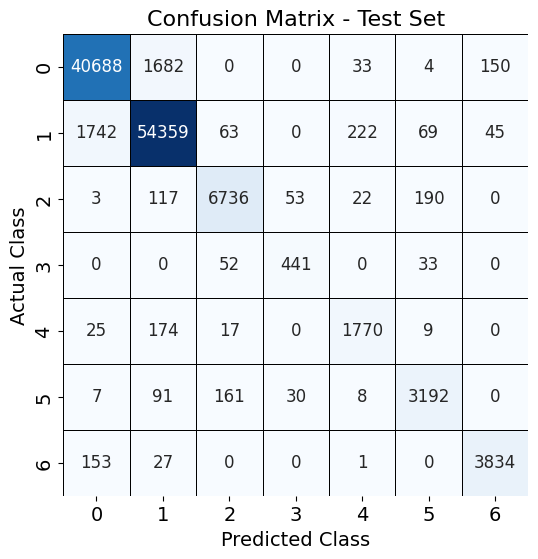

In [181]:
# Confusion matrix for test set
test_conf_matrix2 = confusion_matrix(y_test, y_test_pred_classes2)
plt.figure(figsize=(6, 6))
sns.heatmap(test_conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Test Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [182]:
# Count of actual labels in the training set
train_actual_counts = y_train.value_counts().sort_index()
# Count of predicted labels in the training set
train_pred_counts2 = pd.Series(y_train_pred_classes2).value_counts().sort_index()

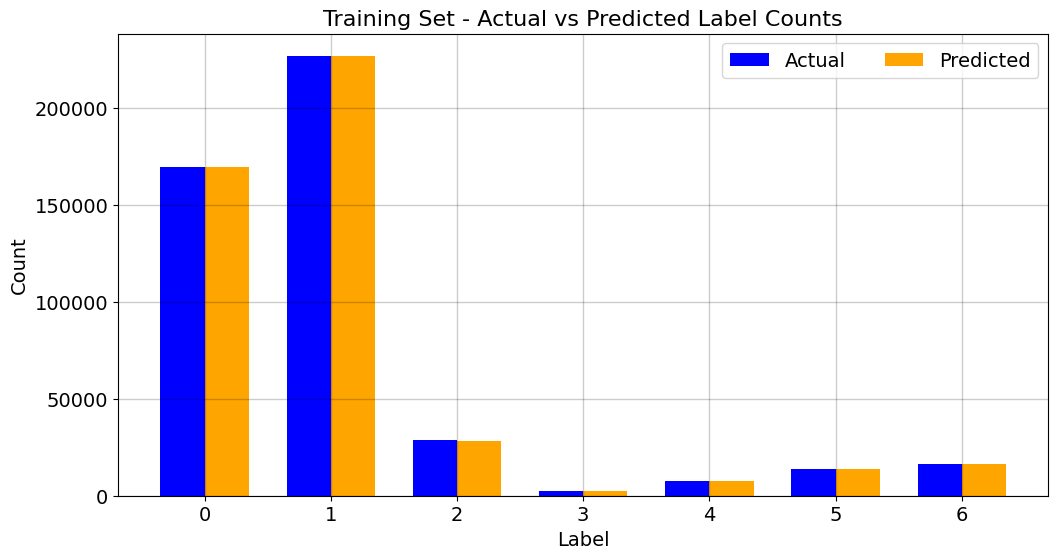

In [183]:
# Bar plot for training set
labels = train_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, train_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, train_pred_counts2, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Training Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.show()

In [184]:
# Count of actual labels in the test set
test_actual_counts = y_test.value_counts().sort_index()
# Count of predicted labels in the test set
test_pred_counts2 = pd.Series(y_test_pred_classes2).value_counts().sort_index()

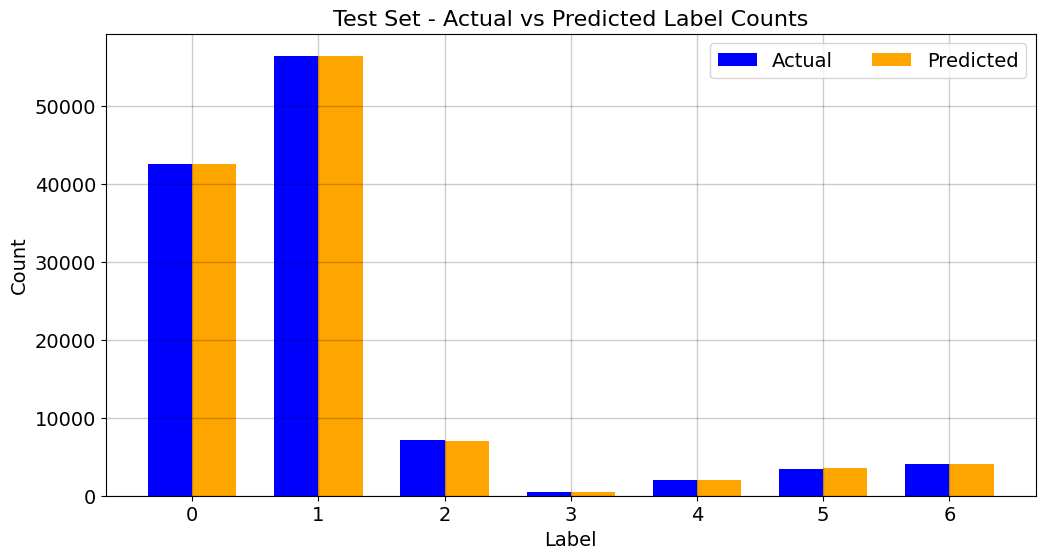

In [185]:
# Bar plot for training set
labels = test_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, test_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, test_pred_counts2, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Test Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.show()

## Sigmoid Activation Function

In [160]:
# Designing the neural network
model3 = Sequential()
model3.add(Input(shape=(X_train.shape[1],)))
model3.add(Dense(512, activation='sigmoid'))
model3.add(Dense(256, activation='sigmoid'))
model3.add(Dense(128, activation='sigmoid'))
model3.add(Dense(64, activation='sigmoid'))
model3.add(Dense(32, activation='sigmoid'))
model3.add(Dense(7, activation='softmax'))

In [161]:
# Compiling the model
opt = optimizers.Adam(learning_rate=0.001)
model3.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=512, verbose=1)

Epoch 1/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5540 - loss: 1.1371 - val_accuracy: 0.7272 - val_loss: 0.6841
Epoch 2/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7294 - loss: 0.6682 - val_accuracy: 0.7427 - val_loss: 0.6261
Epoch 3/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7481 - loss: 0.6112 - val_accuracy: 0.7627 - val_loss: 0.5732
Epoch 4/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7709 - loss: 0.5547 - val_accuracy: 0.7935 - val_loss: 0.5081
Epoch 5/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7935 - loss: 0.4974 - val_accuracy: 0.8071 - val_loss: 0.4644
Epoch 6/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8158 - loss: 0.4479 - val_accuracy: 0.8279 - val_loss: 0.4199
Epoch 7/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8335 - loss: 0.4083 - val_accuracy: 0.8451 - val_loss: 0.3829
Epoch 8/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8476 - loss: 0.3758 - val_accu

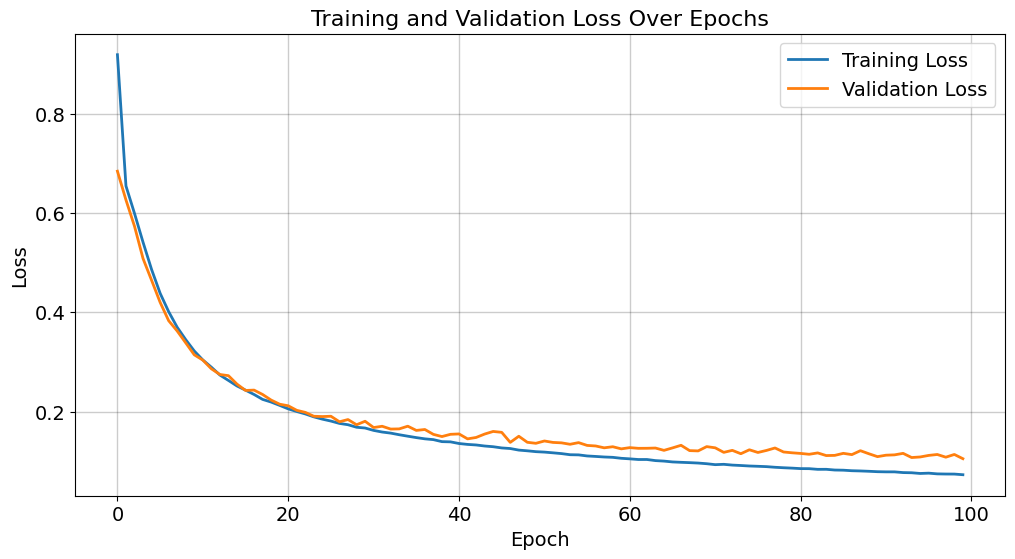

In [162]:
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Loss Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="upper right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

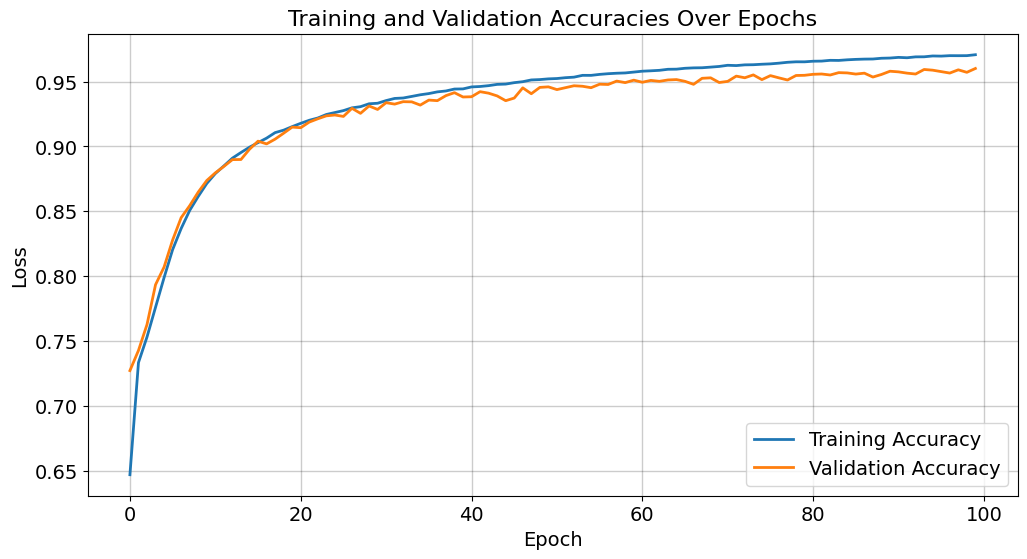

In [163]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.xlabel('Epoch', color='black', fontsize=14)
plt.ylabel('Loss', color='black', fontsize=14)
plt.title('Training and Validation Accuracies Over Epochs', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="lower right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

In [164]:
# Predictions for training and test sets
y_train_pred3 = model3.predict(X_train)
y_test_pred3 = model3.predict(X_test)

14526/14526 ━━━━━━━━━━━━━━━━━━━━ 9s 606us/step
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 2s 589us/step


In [165]:
# Convert predictions to class labels
y_train_pred_classes3 = y_train_pred3.argmax(axis=1)
y_test_pred_classes3 = y_test_pred3.argmax(axis=1)

# Training metrics
train_accuracy3 = accuracy_score(y_train, y_train_pred_classes3)
train_precision3 = precision_score(y_train, y_train_pred_classes3, average='macro')
train_recall3 = recall_score(y_train, y_train_pred_classes3, average='macro')
train_f1_3 = f1_score(y_train, y_train_pred_classes3, average='macro')

# Test metrics
test_accuracy3 = accuracy_score(y_test, y_test_pred_classes3)
test_precision3 = precision_score(y_test, y_test_pred_classes3, average='macro')
test_recall3 = recall_score(y_test, y_test_pred_classes3, average='macro')
test_f1_3 = f1_score(y_test, y_test_pred_classes3, average='macro')

In [166]:
print("Training Accuracy (in %):",round(train_accuracy3*100,3))
print("Training Precision (in %):",round(train_precision3*100,3))
print("Training Recall (in %):",round(train_recall3*100,3))
print("Training F1 Score (in %):",round(train_f1_3*100,3))
print()
print("Test Accuracy (in %):",round(test_accuracy3*100,3))
print("Test Precision (in %):",round(test_precision3*100,3))
print("Test Recall (in %):",round(test_recall3*100,3))
print("Test F1 Score (in %):",round(test_f1_3*100,3))

Training Accuracy (in %): 97.432
Training Precision (in %): 96.447
Training Recall (in %): 94.942
Training F1 Score (in %): 95.653

Test Accuracy (in %): 96.012
Test Precision (in %): 94.47
Test Recall (in %): 91.959
Test F1 Score (in %): 93.09


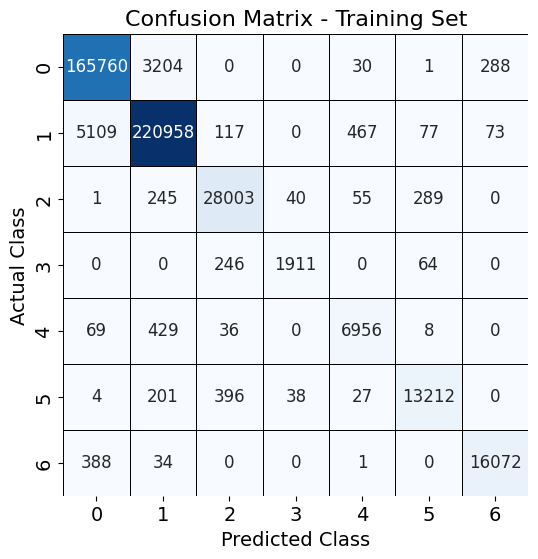

In [167]:
# Confusion matrix for training set
train_conf_matrix3 = confusion_matrix(y_train, y_train_pred_classes3)
plt.figure(figsize=(6, 6))
sns.heatmap(train_conf_matrix3, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Training Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

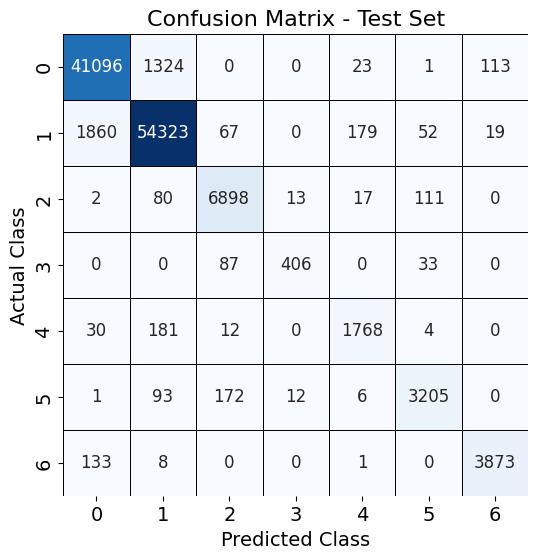

In [168]:
# Confusion matrix for test set
test_conf_matrix3 = confusion_matrix(y_test, y_test_pred_classes3)
plt.figure(figsize=(6, 6))
sns.heatmap(test_conf_matrix3, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', annot_kws={"size": 12})
plt.title('Confusion Matrix - Test Set', color='black', fontsize=16)
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [169]:
# Count of actual labels in the training set
train_actual_counts = y_train.value_counts().sort_index()
# Count of predicted labels in the training set
train_pred_counts3 = pd.Series(y_train_pred_classes3).value_counts().sort_index()

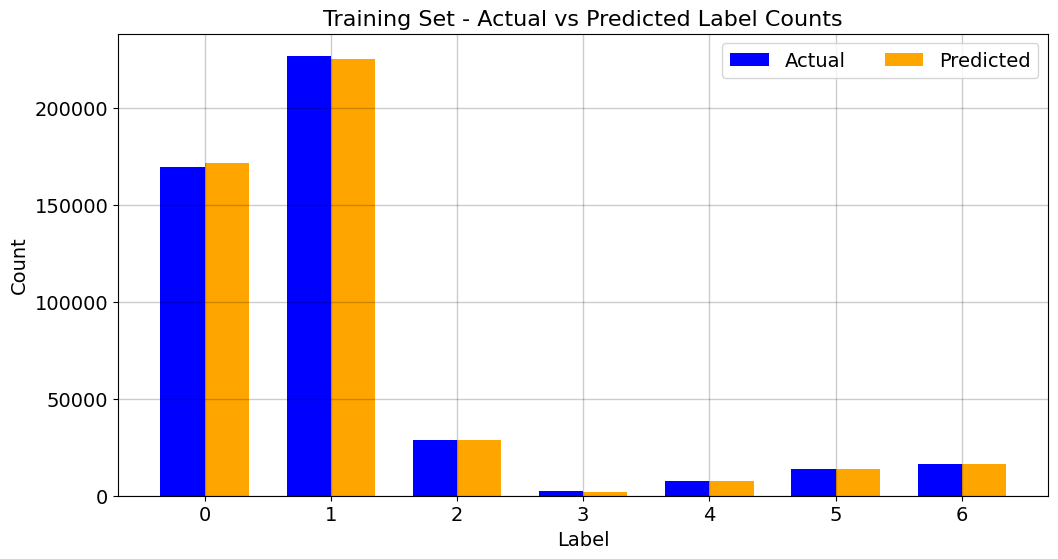

In [170]:
# Bar plot for training set
labels = train_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, train_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, train_pred_counts3, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Training Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.show()

In [171]:
# Count of actual labels in the test set
test_actual_counts = y_test.value_counts().sort_index()
# Count of predicted labels in the test set
test_pred_counts3 = pd.Series(y_test_pred_classes3).value_counts().sort_index()

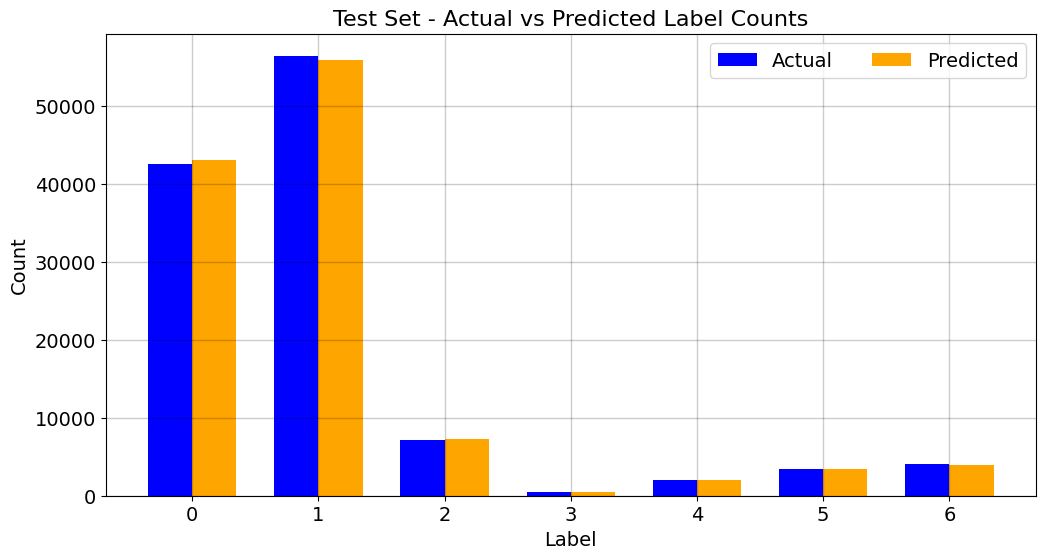

In [172]:
# Bar plot for training set
labels = test_actual_counts.index
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, test_actual_counts, width, label='Actual', color='blue', alpha=1)
plt.bar(x + width/2, test_pred_counts3, width, label='Predicted', color='orange', alpha=1)
plt.xlabel('Label',color='black', fontsize=14)
plt.ylabel('Count',color='black', fontsize=14)
plt.title('Test Set - Actual vs Predicted Label Counts', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.xticks(x, labels)
plt.show()

***